[(1, 2), (2, 3), (2, 4), (3, 4)]
(1, 2)
100


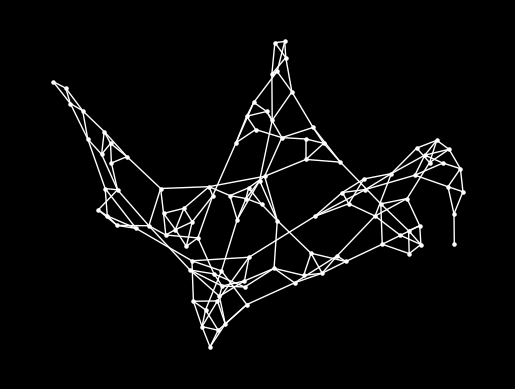

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

'''

This is an example of the very first relation that Wolfram presents as an example:
{(x, y), (x, z)} -> {(x, z), (x, w), (y, w), (z, w)}

Currently tweaking script to make it more general - general.py

'''

# Maximum iterations
ITERATIONS = 100

# Initializes graph
G = nx.Graph()

G.add_edge(1, 2) 
G.add_edge(2, 3) 
G.add_edge(3, 4) 
G.add_edge(2, 4) 

c = 0 
run = True

print(G.edges)
edges = list(G.edges)
print(edges[0])

# Cleans up input of relations
def clean():
    global x
    global y
    global z
    global edges
    global G

    edges = list(G.edges)

    for relation in edges:
        if relation == (x,y) or relation == (x,z):
            G.remove_edge(*relation)


        #Bruteforce search lmao
while run:
    for relation in edges:
        foundy=False
        foundz=False
        x = relation[0]
        for search in edges:
            if foundy:
                # print('x: {x}\nsearch[0]: {search[0]}')
                # exit()

                if search[0] == x:
                    if search[1] != y:
                        z = search[1]
                        foundz = True

            else:
                if search[0] == x:
                    y = search[1]
                    foundy = True

        if foundy and foundz:
            clean()
            G.add_edge(x,z)
            G.add_edge(x,str(c))
            G.add_edge(y,str(c))
            G.add_edge(z,str(c))
            edges = list(G.edges)
            c += 1

        if c >= ITERATIONS: 
            print(c)
            run = False
            # print(edges)
            fig, ax = plt.subplots()
            ax.set_facecolor('black')
            nx.draw(G, with_labels=False, node_shape='.',node_color='w', edge_color='w', node_size=20)
            ax.set_facecolor('black')
            ax.axis('off')
            fig.set_facecolor('black')

            # Shows graph
            plt.show()
            break
            



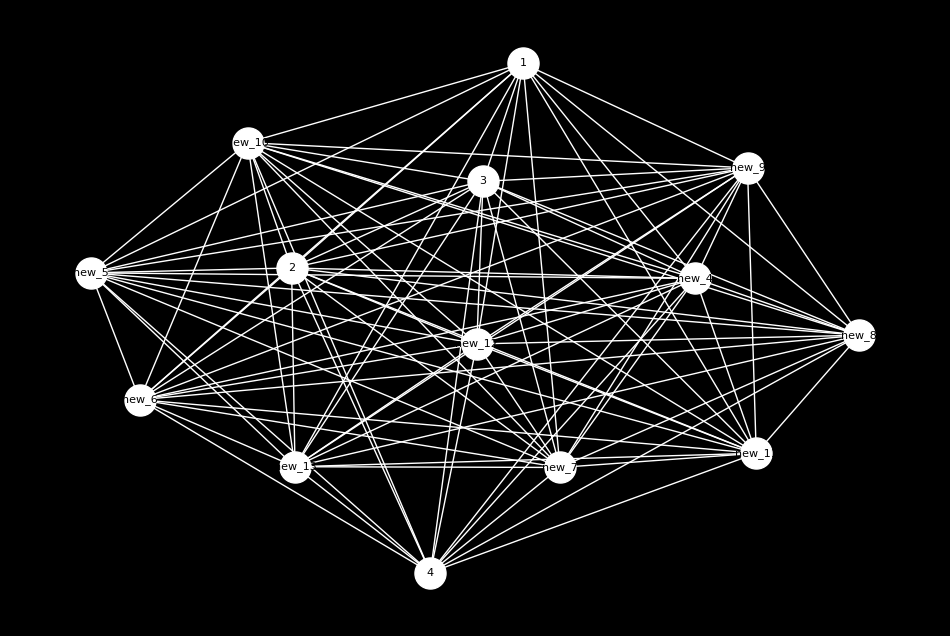

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def apply_rule(G, rule_vector):
    """
    Apply a rule to the graph based on the given rule vector.
    
    :param G: NetworkX graph
    :param rule_vector: List of tuples, each representing a rule component
    :return: Updated graph
    """
    edges = list(G.edges())
    new_edges = []
    
    for i in range(0, len(edges), 2):
        if i+1 < len(edges):
            x, y = edges[i]
            _, z = edges[i+1]
            
            for component in rule_vector:
                if component[0] == 1:  # This component is active in the rule
                    if component[1:] == (1, 0, 0):
                        new_edges.append((x, z))
                    elif component[1:] == (1, 0, 1):
                        new_edges.append((x, f"new_{len(G.nodes())}"))
                    elif component[1:] == (0, 1, 1):
                        new_edges.append((y, f"new_{len(G.nodes())}"))
                    elif component[1:] == (0, 0, 1):
                        new_edges.append((z, f"new_{len(G.nodes())}"))
    
    G.add_edges_from(new_edges)
    return G

def visualize_graph(G):
    """
    Visualize the graph.
    
    :param G: NetworkX graph
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_facecolor('black')
    nx.draw(G, with_labels=True, node_color='w', edge_color='w', node_size=500, font_size=8, font_color='black')
    ax.set_facecolor('black')
    ax.axis('off')
    fig.set_facecolor('black')
    plt.show()

# Initialize graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (2, 4)])

# Define rule vector
# Each tuple represents (is_active, connects_x, connects_y, creates_new_node)
rule_vector = [
    (1, 1, 0, 0),  # (x, z)
    (1, 1, 0, 1),  # (x, new)
    (1, 0, 1, 1),  # (y, new)
    (1, 0, 0, 1),  # (z, new)
]

# Apply rule for a number of iterations
ITERATIONS = 10
for _ in range(ITERATIONS):
    G = apply_rule(G, rule_vector)

# Visualize the final graph
visualize_graph(G)

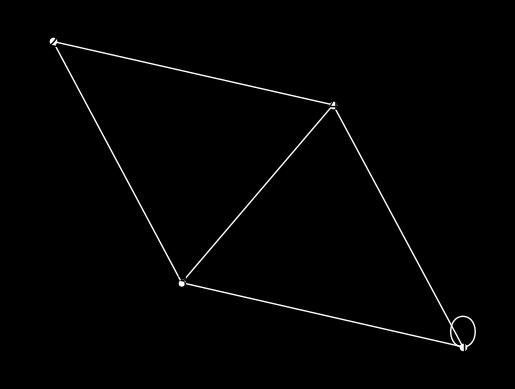

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Maximum iterations
ITERATIONS = 100

# Initialize graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(2, 4)

# General rule-application process
def apply_rule(graph, rule):
    """
    Applies a transformation rule to the graph.
    rule is a dictionary where 'input' defines the pattern to match
    and 'output' defines the new edges to create.
    """
    input_edges = rule['input']
    output_edges = rule['output']
    edges_to_remove = []
    
    # Find edges that match the input pattern
    for edge in list(graph.edges):
        if edge in input_edges:
            edges_to_remove.append(edge)
    
    # Remove the input edges from the graph
    graph.remove_edges_from(edges_to_remove)
    
    # Add the output edges to the graph
    graph.add_edges_from(output_edges)
    
    return graph

# Rule set encoded as input-output transformations
rules = [
    {
        'input': [(1, 2), (1, 3)],
        'output': [(1, 3), (1, 4), (2, 4), (3, 4)]
    },
    {
        'input': [(1, 2)],
        'output': [(1, 1), (1, 3)]
    }
    # Add more rules as needed
]

# Apply rules iteratively
c = 0
run = True

while run and c < ITERATIONS:
    for rule in rules:
        G = apply_rule(G, rule)
    
    c += 1

# Plot the graph
fig, ax = plt.subplots()
ax.set_facecolor('black')
nx.draw(G, with_labels=True, node_shape='o', node_color='w', edge_color='w', node_size=20)
ax.set_facecolor('black')
ax.axis('off')
fig.set_facecolor('black')

# Show the graph
plt.show()


In [5]:
pip install netomaton

  Preparing metadata (setup.py) ... done
  Created wheel for netomaton: filename=netomaton-1.3.0-py3-none-any.whl size=51381 sha256=6f9441c72e5fc917fdb1ce9de42539d3f83c4402bdee511cea0dc77bcae28531
  Stored in directory: /home/flowers-user/.cache/pip/wheels/57/0b/0b/83951f83c054b443e8d7612088c28ac8489e174a1827da68e1
Successfully built netomaton
Note: you may need to restart the kernel to use updated packages.


no rule defined


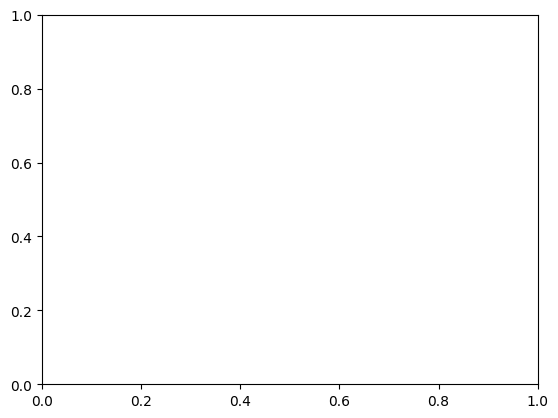

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import re

rule  = ""
invars = ""
outvars = ""

def plot_graph(edges):
	G = nx.Graph()
	G.add_edges_from(edges)
	if len(edges) < 40:
		# wolfram uses a proprietary force-directed graph layout algorithm
		# pos = nx.spectral_layout(G)
		pos = nx.spring_layout(G, seed=42)
		nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, node_shape='o', alpha=0.8)
		nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)
		nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle="-|>", arrowsize=20, width=1.0, edge_color='black', alpha=1)
	else:
		iterations = max(1, int(80 - 0.05 * len(edges)))
		print(f"iterations = {iterations}")
		pos = nx.spring_layout(G, iterations=iterations)
		nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, edge_color='black', alpha=1)
	plt.draw()

def substitution_test(relation):
	variables = []
	if len(relation) != len(invars):
		return False, []
	for i in range(len(relation)):
		if len(relation[i]) != len(invars[i]):
			return False, []
		for k in range(len(relation[i])):
			variables.append([invars[i][k], relation[i][k]])

	#find conflicts
	element_dict = {}
	for item in variables:
		if item[0] in element_dict:
			if element_dict[item[0]] != item[1]:
				return False, []
		else:
			element_dict[item[0]] = item[1]

	#sort and del duplicates
	variables = [tuple(x) for x in variables]
	variables = list(set(variables))
	variables.sort(key=lambda x: x[0])
	variables = [list(x) for x in variables]

	flat = [item[1] for item in variables]
	# print("flat")
	# print(flat)
	# exit(0)
	return True, flat

def _generate_relation_substitution():
	code = "def relation_substition(a=0,b=0,c=0,d=0,e=0,f=0,g=0,h=0,i=0,j=0,k=0):\n"
	code +=	"	return " + str(outvars).replace("'", "") + "\n"
	print("\n" + code)
	exec(code, globals())

def _count_unique(list2d):
	unique_elements = set()
	for sublist in list2d:
		for elem in sublist:
			unique_elements.add(elem)
	return len(unique_elements)

def _generate_graph_substitution():
	new_amount = _count_unique(outvars) - _count_unique(invars)
	code = \
	"def graph_substitution(graph):\n" +\
	"	result = []\n" +\
	"	max_val = max(max(p) for p in graph) + 1\n" +\
	"	for i in range(len(graph)):\n"

	inlen = len(invars)
	if inlen == 1:
		code += \
			"\t" * inlen + "	relation = [graph[i]]\n"
	elif inlen == 2:
		code += \
			"		for j in range(i + 1, len(graph)):\n" +\
			"\t" * inlen + "	relation = [graph[i], graph[j]]\n"
	elif inlen == 3:
		code += \
			"		for j in range(i + 1, len(graph)):\n" +\
			"			for k in range(j + 1, len(graph)):\n" +\
			"\t" * inlen + "	relation = [graph[i], graph[j], graph[k]]\n"
	elif inlen == 4:
		code += \
			"		for j in range(i + 1, len(graph)):\n" +\
			"			for k in range(j + 1, len(graph)):\n" +\
			"				for l in range(k + 1, len(graph)):\n" +\
			"\t" * inlen + "	relation = [graph[i], graph[j], graph[k], graph[l]]\n"
	else:
		print("undefined invar width")
		exit(0)

	code +=\
	"\t" * inlen + "	should_sub, flat = substitution_test(relation)\n" +\
	"\t" * inlen + "	if should_sub:\n" +\
	"\t" * inlen + "		result += relation_substition(*flat, max_val + 0, max_val + 1, max_val + 2, max_val + 3, max_val + 4)\n" +\
	"\t" * inlen + "		max_val += " + str(new_amount) + "\n" +\
	"\t" * inlen + "	else:\n" +\
	"\t" * inlen + "		result += relation\n"

	code +=\
	"	return result\n"
	print(code)
	exec(code, globals())

def xyz_to_abc(rule):
	replacement_chars = 'abcdefghijklmnopqrstuvwxyz'
	mapping = {}
	output = ""
	index = 0
	for char in rule:
		if char.isalnum() and char not in mapping:
			mapping[char] = replacement_chars[index]
			index += 1
		output += mapping.get(char, char)
	print(output)
	return output

def parse_rule_arrays(string):
	res = []
	current_list = []
	for char in string:
		if char == '{':
			current_list = []
		elif char == '}':
			if current_list:
				if len(current_list) == 2:
					res.append(current_list)
				elif len(current_list) == 3:
					res.append([current_list[0], current_list[1]])
					res.append([current_list[1], current_list[2]])
				else:
					print("undefined rule width")
					exit(0)
				current_list = []
		else:
			if char != ',' and char != ' ':
				current_list.append(char)
	return res

def parse_rule():
	global invars
	global outvars
	rules = xyz_to_abc(rule).split("->")
	invars = parse_rule_arrays(rules[0])
	outvars = parse_rule_arrays(rules[1])
	print(str(invars) + " -> " + str(outvars))
	_generate_relation_substitution()
	_generate_graph_substitution()

def fix_graph(initial_graph):
	for i, g in enumerate(initial_graph):
		if len(g) == 2:
			pass
		elif len(g) == 3:
			initial_graph[i] = [g[0], g[1]]
			initial_graph.insert(i, [g[1], g[2]])
		else:
			print("undefined garph")
			exit(0)
	return initial_graph

def evolve_graph(initial_graph, max_steps):
	initial_graph = fix_graph(initial_graph)
	parse_rule()

	global current_step
	global auto_step
	start_time = time.time()
	prev_solution = -1
	graph = []

	while True:
		if auto_step:
			if time.time() - start_time >= 2:
				start_time = time.time()
				current_step += 1
				if current_step == max_steps:
					auto_step = False
		if prev_solution != current_step:
			graph = initial_graph
			prev_solution = current_step
			for _ in range(current_step):
				graph = graph_substitution(graph)
			plt.clf()
			plot_graph(graph)
		plt.title(f"{rule}\nSteps: {current_step}")
		plt.pause(0.1)

# ui functions
def on_window_close(event):
	exit(0)
fig, ax = plt.subplots()
fig.canvas.mpl_connect('close_event', on_window_close)

auto_step = True
current_step = 0
def on_key_press(event):
	global current_step
	global auto_step

	if event.key == "right":
		current_step += 1
		auto_step = False
	elif event.key == "left":
		current_step -= 1
		auto_step = False
	elif event.key == "escape":
		exit(0)
	if current_step < 0:
		current_step = 0
plt.gcf().canvas.mpl_connect("key_press_event", on_key_press)


# https://www.wolframphysics.org/technical-introduction/basic-form-of-models/
# 2.1 Basic structure
# graph = [[1, 2], [1, 3], [2, 3], [4, 1]]
# plot_graph(graph)
# plt.show()

# 2.2 First Example of a Rule
# rule = "{{x, y}} -> {{x, y}, {y, z}}"
# evolve_graph([[1, 2]], 4)

# 2.3 A Slightly Different Rule
# rule = "{{x, y}} -> {{z, y}, {y, x}}"
# evolve_graph([[1, 2]], 5)

# 2.4 Self-Loops (circle)
# rule = "{{x, y}} -> {{y, z}, {z, x}}"
# evolve_graph([[1, 1]], 6)

# 2.4.2 Binary tree
# rule = "{{x, x}} -> {{y, y}, {y, y}, {x, y}}"
# evolve_graph([[1, 1]], 6)

# 2.5 Multiedges
# rule = "{{x, y}} -> {{x, z}, {x, z}, {y, z}}"
# evolve_graph([[1, 1]], 6)

# 2.5.2 Multiedge after one step, but then destroys it
# rule = "{{x, y}} -> {{x, z}, {z, w}, {y, z}}"
# evolve_graph([[1, 1]], 4)

# 2.6 Ternary self-loop
# rule = "{{x, y, z}} -> {{x, y, w}, {y, w, z}}"
# evolve_graph([[1, 1, 1]], 4)

# 2.7 More Than One Relation
# rule = "{{x, y}, {x, z}} -> {{x, y}, {x, w}, {y, w}, {z, w}}"
# evolve_graph([[1, 2], [1, 3]], 6)

# 2.8 Termination
# rule = "{{x, y, z}, {u, x}} -> {{x, u, v}, {z, y}, {z, u}}"
# evolve_graph([[0, 0, 0], [0, 0]], 6)

#TODO: separate graphs in plot_graph()
# 2.9 Connectedness
# rule = "{{x, y}} -> {{x, x}, {z, x}}"
# evolve_graph([[1, 2]], 4)

# 3.5 Rules Depending on a Single Binary Relation
# rule = "{{x, y}} -> {{x, z}, {y, z}, {z, z}}"
# evolve_graph([[1, 1]], 5)

# 3.5.2 Triangle sprouts
# rule = "{{x, y}} -> {{x, y}, {y, z}, {z, x}}"
# evolve_graph([[1, 2]], 5)

# 3.5.3 Nested form
# rule = "{{1, 2}} -> {{3, 4}, {4, 3}, {3, 1}, {3, 2}}"
# evolve_graph([[0, 0]], 5)

# 3.5.4 Simple structure
# rule = "{{1, 2}} -> {{2, 3}, {2, 3}, {3, 1}, {3, 1}}"
# evolve_graph([[0, 0]], 5)

# 3.6 Growing arms
# rule = "{{1, 1, 2}} -> {{2, 2, 3}, {1, 2, 1}}, {{0, 0, 0}}"
# evolve_graph([[1, 1, 1]], 5)

# 3.6.2 Fibonacci tree
# rule = "{{x, x, y}} -> {{y, y, y}, {x, y, z}}, {{0, 0, 0}}"
# evolve_graph([[1, 1], [1, 2]], 5)

# 3.7
# rule = "{{x, y}, {x, z}} -> {{x, w}, {y, w}, {z, w}}"
# evolve_graph([[0, 1], [0, 2]], 5)

# 3.8
# rule = "{{x, y}, {x, z}} -> {{y, z}, {y, w}, {z, w}, {w, x}}"
# evolve_graph([[0, 0], [0, 0]], 5)

# 3.9
# rule = "{{x, y}, {y, z}} -> {{x, y}, {y, x}, {w, x}, {w, z}}"
# evolve_graph([[0, 0], [0, 0]], 5)

# 3.10
# rule = "{{x, y}, {y, z}} -> {{w, y}, {y, z}, {z, w}, {x, w}}"
# evolve_graph([[0, 0], [0, 0]], 5)

if rule == "":
	print("no rule defined")

In [6]:
import msgpack
import gc
import networkx as nx


class Network:
    __slots__ = ("_network", "_rotation_system")

    def __init__(self, n=0):
        """
        Constructs a fully disconnected Network with n nodes.

        :param n: the number of nodes
        """
        self._network = {i: self._new_node() for i in range(n)}
        self._rotation_system = None

    def add_edge(self, i, j, **attr):
        """
        Add an edge from i to j. If i and j do not exist, create them.
        An additional edge will be added if an edge from i to j already exists.

        :param i:

        :param j:

        :param attr:

        :return:
        """
        self._init_node(i)
        self._init_node(j)
        if i not in self._network[j]["incoming"]:
            self._network[j]["incoming"][i] = []
        self._network[j]["incoming"][i].append(attr)
        self._increment_in_degree(j)
        self._increment_out_degree(i)
        self._add_outgoing(i, j)

    def add_edge_bidir(self, i, j, **attr):
        """
        Adds two edges: one from i to j, and one from j to i. The edge attributes (if any
        are provided) will be identical for both edges.

        :param i:

        :param j:

        :param attr:

        :return:
        """
        self.add_edge(i, j, **attr)
        self.add_edge(j, i, **attr)

    def add_node(self, node_label, **attr):
        """
        Add a node. If the node already exists

        :param node_label:

        :param attr:

        :return:
        """
        self._init_node(node_label)
        self._network[node_label].update(attr)

    def update_edge(self, i, j, indices=None, **attr):
        if j not in self._network or i not in self._network[j]["incoming"]:
            raise Exception("edge does not exist")
        if indices is None:
            # update all edges in this connection
            for edge in self._network[j]["incoming"][i]:
                edge.update(attr)
        else:
            for k in indices:
                self._network[j]["incoming"][i][k].update(attr)

    def remove_node(self, node_label):
        for i, v in self._network[node_label]["incoming"].items():
            self._decrement_out_degree(i, n=len(v))
            self._remove_outgoing(i, node_label)
        for j in self._network[node_label]["outgoing"]:
            self._decrement_in_degree(j)
            self._remove_incoming(node_label, j)
        del self._network[node_label]

    def remove_edge(self, i, j):
        """
        Removes all instances of an edge from i to j.

        :param i: the originating node of the edge

        :param j: the target destination node of the edge
        """
        n = len(self._network[j]["incoming"][i])
        self._remove_outgoing(i, j)
        self._decrement_out_degree(i, n=n)
        self._decrement_in_degree(j, n=n)
        self._remove_incoming(i, j)

    @property
    def rotation_system(self):
        return self._rotation_system

    @rotation_system.setter
    def rotation_system(self, rotation_system):
        """
        A rotation system specifies an ordering of the nodes connected to any given node. For example, consider the
        network A<->B<->C, where node A is connected to node B, and node B is connected to node C, and each node is
        connected to itself. A rotation system for this network could be: {A: (A, B), B: (A, B, C), C: (B, C)}. Another
        valid rotation system for this network would be: {A: (B, A), B: (C, B, A), C: (C, B)}.

        :param rotation_system: a dictionary mapping each node (as its label) to a sequence of its incident nodes (the
                                labels of the nodes that are connected to it) and the node itself
        """
        # validate that the rotation system is comprised of nodes in the network
        network_nodes = self.nodes
        for node_label in rotation_system:
            assert node_label in network_nodes, "the node '%s' is not in the network" % node_label
            incoming_nodes = rotation_system[node_label]
            for incoming_node in incoming_nodes:
                assert incoming_node in network_nodes, "the incoming node '%s' is not in the network" % incoming_node
        self._rotation_system = rotation_system

    def in_edges(self, node_label):
        return self._network[node_label]["incoming"]

    def edge(self, i, j):
        return self._network[j]["incoming"][i]

    def to_dict(self):
        return self._network

    @property
    def nodes(self):
        return self._network.keys()

    @property
    def edges(self):
        for j, v in self._network.items():
            for i in v["incoming"]:
                for k in v["incoming"][i]:
                    yield i, j, k

    def has_edge(self, i, j):
        return j in self._network and i in self._network[j]["incoming"]

    def degree(self, node_label):
        return self._network[node_label]["out"] + self._network[node_label]["in"]

    def in_degree(self, node_label):
        return self._network[node_label]["in"]

    def out_degree(self, node_label):
        return self._network[node_label]["out"]

    def copy(self):
        return self.decompress(self.compress())

    def compress(self):
        """
        Compresses the Network into a binary format.

        :return: packed bytes
        """
        return _Compressor.compress(self._network)

    @staticmethod
    def decompress(packed):
        """
        Decompresses a compressed Network.

        :param packed: packed bytes

        :return: a Network
        """
        n = Network()
        n._network = _Compressor.decompress(packed)
        return n

    @staticmethod
    def from_networkx(G):
        """
        Creates a Network from the given NetworkX graph.

        :param G: a NetworkX graph

        :return: a Network
        """
        network = Network()
        for node in G.nodes(data=True):
            network.add_node(node[0], **node[1])
        for edge in G.edges(data=True):
            network.add_edge(edge[0], edge[1], **edge[2])
        return network

    def to_networkx(self):
        """
        Returns this Network as a NetworkX MultiDiGraph.

        :return: a NetworkX MultiDiGraph
        """
        G = nx.MultiDiGraph()
        for node in self.nodes:
            atts = {}
            for key in self._network[node]:
                if key not in self._new_node():
                    atts[key] = self._network[node][key]
            G.add_node(node, **atts)
        for i, j, data in self.edges:
            G.add_edge(i, j, **data)
        return G

    def to_adjacency_matrix(self, nodelist=None, sum_multiedges=True, weight="weight"):
        """
        Returns this Network as an adjacency matrix. A connection is represented by a int greater than zero, and zero
        means no connection is present.

        :param nodelist: defines the node order in the adjacency matrix; if no nodelist is provided, then the order
                         is determined by Network.nodes. (default is None)

        :param sum_multiedges : whether the presence of a connection should be indicated by summing the number of
                                edges in the connection (default is True)

        :param weight : a string or None indicating which edge attribute contains the edge weight. If an edge does
                        not contain the attribute, then 1 is used. (default is 'weight')

        :return: an adjacency matrix representing this Network
        """
        num_nodes = len(self._network)
        M = [[0]*num_nodes for _ in range(num_nodes)]
        if not nodelist:
            nodelist = list(self.nodes)
        for n1, n2, atts in self.edges:
            w = atts[weight] if weight in atts else 1
            i = nodelist.index(n1)
            j = nodelist.index(n2)
            if sum_multiedges:
                M[i][j] += w
            else:
                M[i][j] = w
        return M

    def _init_node(self, node_label):
        if node_label not in self._network:
            self._network[node_label] = self._new_node()

    def _new_node(self):
        return {"in": 0, "out": 0, "incoming": {}, "outgoing": []}

    def _increment_out_degree(self, node_label, n=1):
        self._network[node_label]["out"] += n

    def _decrement_out_degree(self, node_label, n=1):
        self._network[node_label]["out"] -= n

    def _increment_in_degree(self, node_label, n=1):
        self._network[node_label]["in"] += n

    def _decrement_in_degree(self, node_label, n=1):
        self._network[node_label]["in"] -= n

    def _add_outgoing(self, i, j):
        self._network[i]["outgoing"].append(j)

    def _remove_outgoing(self, i, j):
        self._network[i]["outgoing"] = [x for x in self._network[i]["outgoing"] if x != j]

    def _remove_incoming(self, i, j):
        if i in self._network[j]["incoming"]:
            del self._network[j]["incoming"][i]

    def __getitem__(self, item):
        return self._network[item]

    def __delitem__(self, key):
        self.remove_node(key)

    def __len__(self):
        return len(self._network)

    def __eq__(self, other):
        return self._network == other._network


class State:
    __slots__ = ("_activities", "_network", "_compression")

    def __init__(self, activities=None, network=None, compression=False):
        """

        :param activities: a dict from node label to activity

        :param network: a Network
        """
        self._compression = compression
        self._activities = None
        self.activities = activities
        self._network = None
        self.network = network

    @property
    def activities(self):
        if self._activities:
            return _Compressor.decompress(self._activities) if self._compression else self._activities

    @activities.setter
    def activities(self, a):
        if a:
            self._activities = _Compressor.compress(a) if self._compression else a

    @property
    def network(self):
        if self._network:
            return Network.decompress(self._network) if self._compression else self._network

    @network.setter
    def network(self, n):
        if n:
            self._network = n.compress() if self._compression else n


class _Compressor:
    def __init__(self):
        pass

    @staticmethod
    def compress(obj):
        """
        Compresses the given object into a binary format.

        :param network: an object

        :return: packed bytes
        """
        return msgpack.packb(obj)

    @staticmethod
    def decompress(packed):
        """
        Decompresses a compressed object.

        :param packed: packed bytes

        :return: a decompressed object
        """
        gc.disable()
        d = msgpack.unpackb(packed, strict_map_key=False)
        gc.enable()
        return d
    


class WolframPhysicsModel:
    def __init__(self, configuration, rules):
        self.network, self.last_node = self._init_network_and_conditions(configuration)
        self.rules = rules

    @staticmethod
    def _init_network_and_conditions(config):
        """
        The network for the Wolfram Physics Model is comprised of connection states that consist of a "label",
        that indicates the relation label, and optionally a "hyperedge_index", if the pair of nodes belong to a
        hyperedge, and a "unary" flag, to indicate a unary connection.
        """
        network = Network()
        last_node = 0
        for c, relation in enumerate(config):
            prev = None
            edge_label = str(c+1)
            is_hyperedge = len(relation) > 2
            next_edge_num = 0
            for node in relation:
                if prev is not None:
                    prev_state = {"label": edge_label}
                    if is_hyperedge:
                        prev_state["hyperedge_index"] = next_edge_num
                    network.add_edge(prev, node, **prev_state)
                    next_edge_num += 1
                prev = node
                if node > last_node:
                    last_node = node
            if len(relation) == 1:
                n = relation[0]
                network.add_edge(n, n, label=edge_label, unary=True)
        return network, last_node

    @staticmethod
    def network_to_config(network):
        edges = {}
        hyperedges = {}
        for to_node in network.nodes:
            in_edges = network.in_edges(to_node)
            for i in in_edges:
                from_node = i
                # connection = in_edges[i]
                for connection in in_edges[i]:
                    edge_label = connection["label"]
                    if "unary" in connection:
                        edges[edge_label] = (from_node,)
                    elif "hyperedge_index" in connection:
                        if edge_label not in hyperedges:
                            hyperedges[edge_label] = []
                        hyperedges[edge_label].append(((from_node, to_node), connection["hyperedge_index"]))
                    else:
                        edges[edge_label] = (from_node, to_node)

        # merge hyperedges
        merged_hyperedges = {}
        if hyperedges:
            for edge_label in hyperedges:
                parts = hyperedges[edge_label]
                merged = [0] * (len(parts) + 1)
                for part in parts:
                    edge = part[0]
                    index = part[1]
                    merged[index] = edge[0]
                    if (index + 2) == len(merged):
                        merged[-1] = edge[1]
                merged_hyperedges[edge_label] = tuple(merged)

        edges.update(merged_hyperedges)
        config = [edges[label] for label in sorted(edges)]  # sort so that we can preserve the order of the relations

        return config

    def topology_rule(self, cctx):
        relations = self.network_to_config(cctx.network)

        matched_relations = []
        unmatched_relations = []
        partially_matched = []

        # keep scanning until there is an iteration where no matches are produced
        #  reset the symbol bindings during each scan
        scanning = True
        while scanning:

            # bind nodes to symbols
            symbol_bindings = {}

            for rule in self.rules["in"]:

                match_found = False

                for relation in list(relations):  # iterate over a copy of the list so that we can remove from the original
                    if self._matches(rule, relation, symbol_bindings):
                       partially_matched.append(relation)
                       relations.remove(relation)
                       match_found = True
                       break

                if len(partially_matched) == len(self.rules["in"]):
                    matched_relations.append((partially_matched, symbol_bindings))
                    partially_matched = []

                scanning = match_found

            # move all partially matched to unmatched
            unmatched_relations.extend(partially_matched)
            partially_matched = []

        new_config = []
        # add the relations that did not match the rules
        new_config.extend(relations)
        new_config.extend(unmatched_relations)
        # add the new relations
        for matched, bindings in matched_relations:
            for rule_out in self.rules["out"]:
                new_edge = []
                for symbol in rule_out:
                    if symbol not in bindings:
                        self.last_node += 1
                        bindings[symbol] = self.last_node
                    new_edge.append(bindings[symbol])
                new_config.append(tuple(new_edge))

        self.network, self.last_node = self._init_network_and_conditions(new_config)

        return self.network

    def _matches(self, rule, relation, symbol_bindings):
        if len(rule) != len(relation):
            #  rule does not match this relation
            return False

        added_symbols = []
        for i, symbol in enumerate(rule):
            if symbol in symbol_bindings:
                if relation[i] != symbol_bindings[symbol]:
                    #  rule does not match this relation
                    for added in added_symbols:
                        del symbol_bindings[added]
                    return False
                else:
                    continue

            symbol_bindings[symbol] = relation[i]
            added_symbols.append(symbol)

        return True

    def to_configurations(self, trajectory):
        configs = []
        for state in trajectory:
            configs.append(self.network_to_config(state.network))
        return configs
    

rules = {
    "in": [(1, 1, 2), (3, 4, 1)], "out": [(1, 1, 4), (5, 4, 3), (2, 5, 1)]
}
config = [(1, 1, 1), (1, 1, 1)]

model = WolframPhysicsModel(config, rules)


trajectory = ntm.evolve(network=model.network, topology_rule=model.topology_rule, timesteps=198)

show_network(trajectory[-1].network)

In [7]:
pip install git+https://github.com/lantunes/netomaton.git@dependabot/pip/numpy-1.22.0


  Cloning https://github.com/lantunes/netomaton.git (to revision dependabot/pip/numpy-1.22.0) to /tmp/pip-req-build-38pb76ht
  Running command git clone --filter=blob:none --quiet https://github.com/lantunes/netomaton.git /tmp/pip-req-build-38pb76ht
  Running command git checkout -b dependabot/pip/numpy-1.22.0 --track origin/dependabot/pip/numpy-1.22.0
  Switched to a new branch 'dependabot/pip/numpy-1.22.0'
  Branch 'dependabot/pip/numpy-1.22.0' set up to track remote branch 'dependabot/pip/numpy-1.22.0' from 'origin'.
  Resolved https://github.com/lantunes/netomaton.git to commit ef57df624c1b42afda487a13123bb4bf6c4b4b45
  Preparing metadata (setup.py) ... done
  Created wheel for netomaton: filename=netomaton-1.1.2-py3-none-any.whl size=47679 sha256=c1157e4661c3fa26d7ac91f72f469bdb9e7ba19f25ace64b755d1b7c049c9a90
  Stored in directory: /tmp/pip-ephem-wheel-cache-3xesgrz9/wheels/9c/4a/57/c63b3247a6fd6aea748d3f47f6c81b2e676f72eca099ba5417
Successfully built netomaton
  Attempting unins

In [1]:
import netomaton as ntm
from netomaton.vis import show_network

# wm1167
rules = {
    "in": [(1, 1, 2), (3, 4, 1)], "out": [(1, 1, 4), (5, 4, 3), (2, 5, 1)]
}
config = [(1, 1, 1), (1, 1, 1)]

model = ntm.WolframPhysicsModel(config, rules)

trajectory = ntm.evolve(network=model.network, topology_rule=model.topology_rule, timesteps=198)

show_network(trajectory[-1].network)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations